# Key considerations in the design process of novel biomarkers

## Summary

The following notebook presents an open access guide for the design of biosensors. The aim of this guide is to outline the key considerations that must be made for effective biosensors and to provide interactive resources and tools to faciliate this process.

The current scope of this guide focuses on: 
- the key contextual considerations important in the early design stage (Phase 1)
- how the biosensor can be optimised from a mass transport point of view (Phase 2)

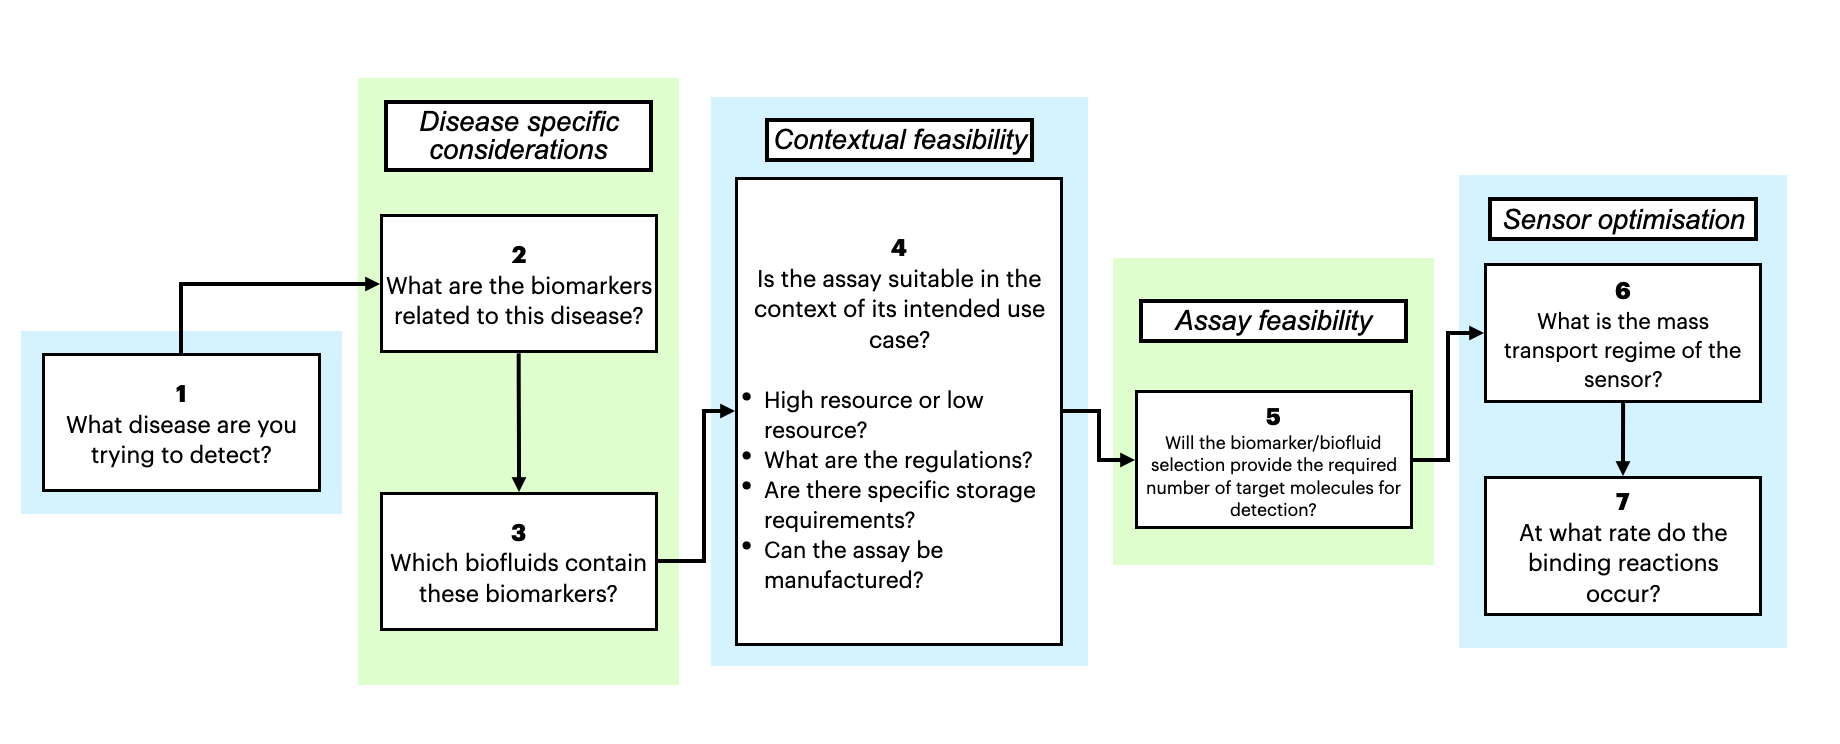

###### 1 ) What disease?

...

###### 2 + 3 ) What biomarker and biofluid can be used?

To find data on biomarkers for specific diseases, including the biofluid they are found in and their usual concentratyions, find some of the following resources:

- https://hmdb.ca/ Human Metabolome Database (open access)
- https://www.gobiomdbplus.com/ Gobiom Biomarker Database (license required) 

###### 4 ) Contextual Feasibility

...

###### 4 ) Assay Feasibility

...

###### 5 ) Sensor optimisation

...


For quick navigation, follow the table of contents tab found in the upper command ribbon:

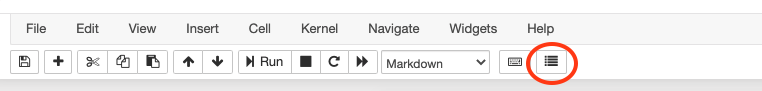





In [1]:
# Declarations

import math
sqrt=math.sqrt

import numpy as np

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})

from scipy import constants

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

## Biomarker and Sample considerations

Before the sensor is designed, the application of the test must be considered contextually. 

For example, whilst a blood test may yield a high amount of target molecules for easy detection, the assay user may be untrained, or possibly be the patient themselves. Does the sample choice reflect this?

If a blood sample can be obtained, is there a requirement for specific sample processing? Does the facility have access to such equipment or trained personnel?


###### The decision table below evaluates how appropriate different candidate samples are for key contextual criteria.

As this is a open access tool, the aim is to provide a basis for further research and information to be added. Therefore this table is directly editable using the following link:
https://docs.google.com/spreadsheets/d/1w7n3qJ40-Pib7sPSsolEprpxzL3n2KdgM-2IQbjKZ6M/edit?usp=sharing

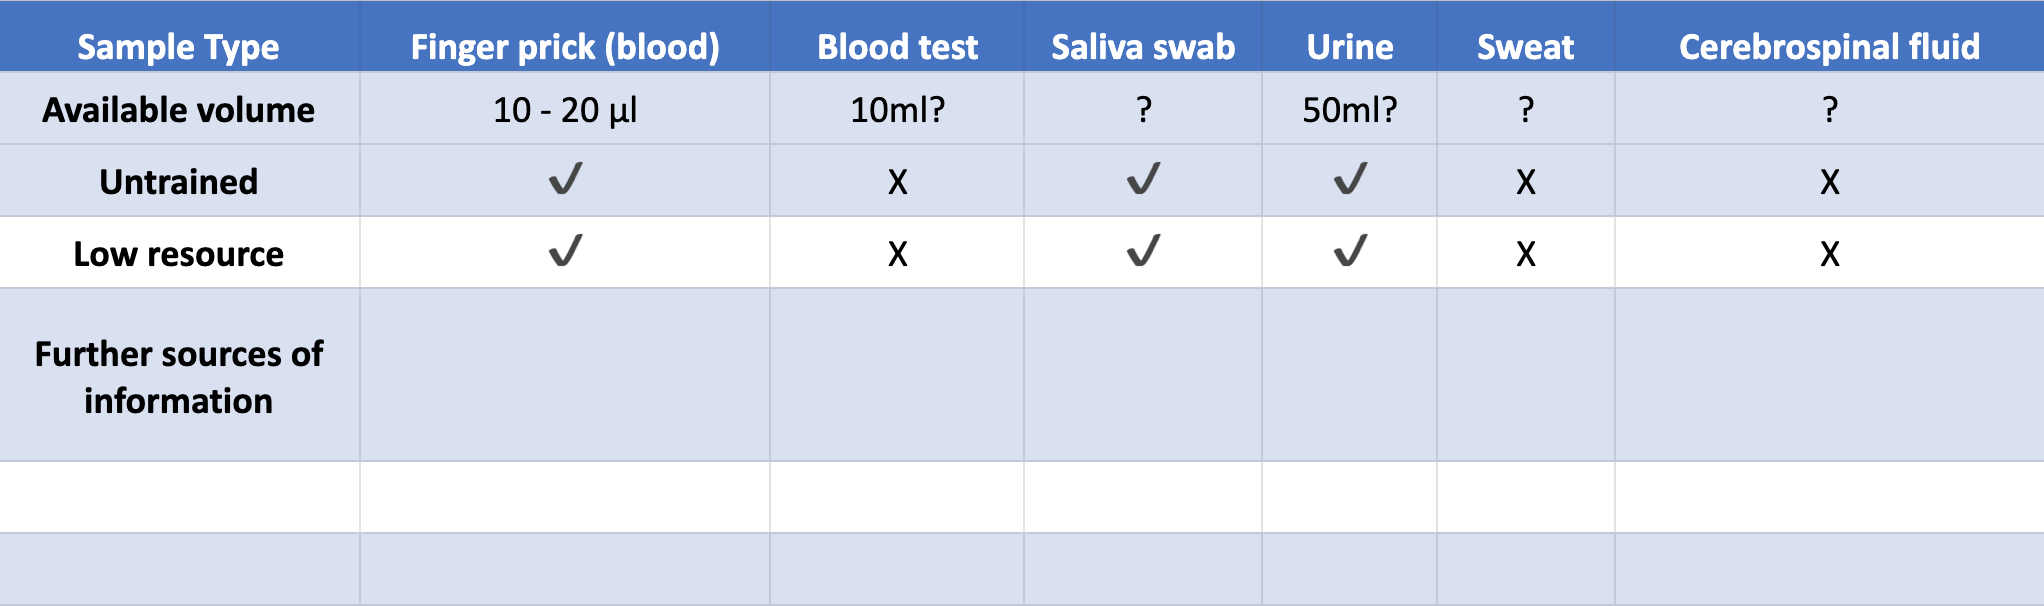

### Calculate total number of target molecules

It is important to clarify that the candidate sample will provide enough target biomarkers for detection in the sensor. 

Small sample sizes of very low concentrations will require a much different approach compared to a larger sample with a high concentration of target biomarkers.

This can be simply found through an equation linking concentration and the sample size. The Human Metabolome Database (https://hmdb.ca/) gives the concentrations of biomarkers that can be used to identify a range of diseases. 

###### Example: detecting Ketoacidosis in childeren

For example, using the HMBD, it can be found that children ages 1-13 suffering from Ketoacidosis can display abnormal levels of Acetoacetic acid in blood. 

The database gives a concentration of 910 uM (micromolar). 

Using the equation, a sample size of 10ml taken from a blood test gives 5.5e+18 available molecules for detection.

With this information, decisions regarding detection limits can be considered furtherly to evaluate wether the sample size is large enough for detection.

In [25]:
#Inputs

# Use either Mass concentraion (Conc) or M depending on given units

V = 10e-3     # volume (L)


## Conc = 50  # mass concentration of target molecule (gram/L)
## Mo = 50    # molar mass (g/mol)

## *or*

M = 910e-6        # molarity (mol/L)


In [26]:
# Calculation

N_A = 6.02*1e+23         # avogadros number
## M = Conc/Mo           # molarity (mol/L) *remove '##' if using mass conc, leave if using molarity*
mol = M*V                # total number of moles
Nm = mol*N_A             # number of available molecules


print ("Number of available molecules:" + format(Nm,"10.2E"))

Number of available molecules:  5.48E+18


### More contextual considerations 

#### Validating test use in developing countries

If an assay is to be used in a low resource setting further considerations for sensor design must be taken. The WHO has developed 'ASSURE': a benchmark test to determining the most appropriate tests for such scenarios [2] . 

This is summarised in 'Requirements for high impact diagnostics in the developing world' [3] as shown below.

This consideration is discussed further in a later publication from the WHO [1].

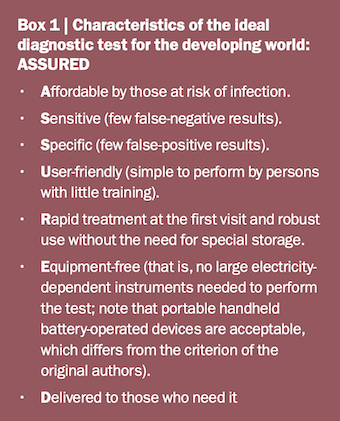

- High resource vs Low resource?
- Cost effective?
- Storage needs?
- Is the sample time sensitive?
- Manufacturing? 
- Regulations?
- Accessibility?
- Distribution?

## Declare sensor parameters

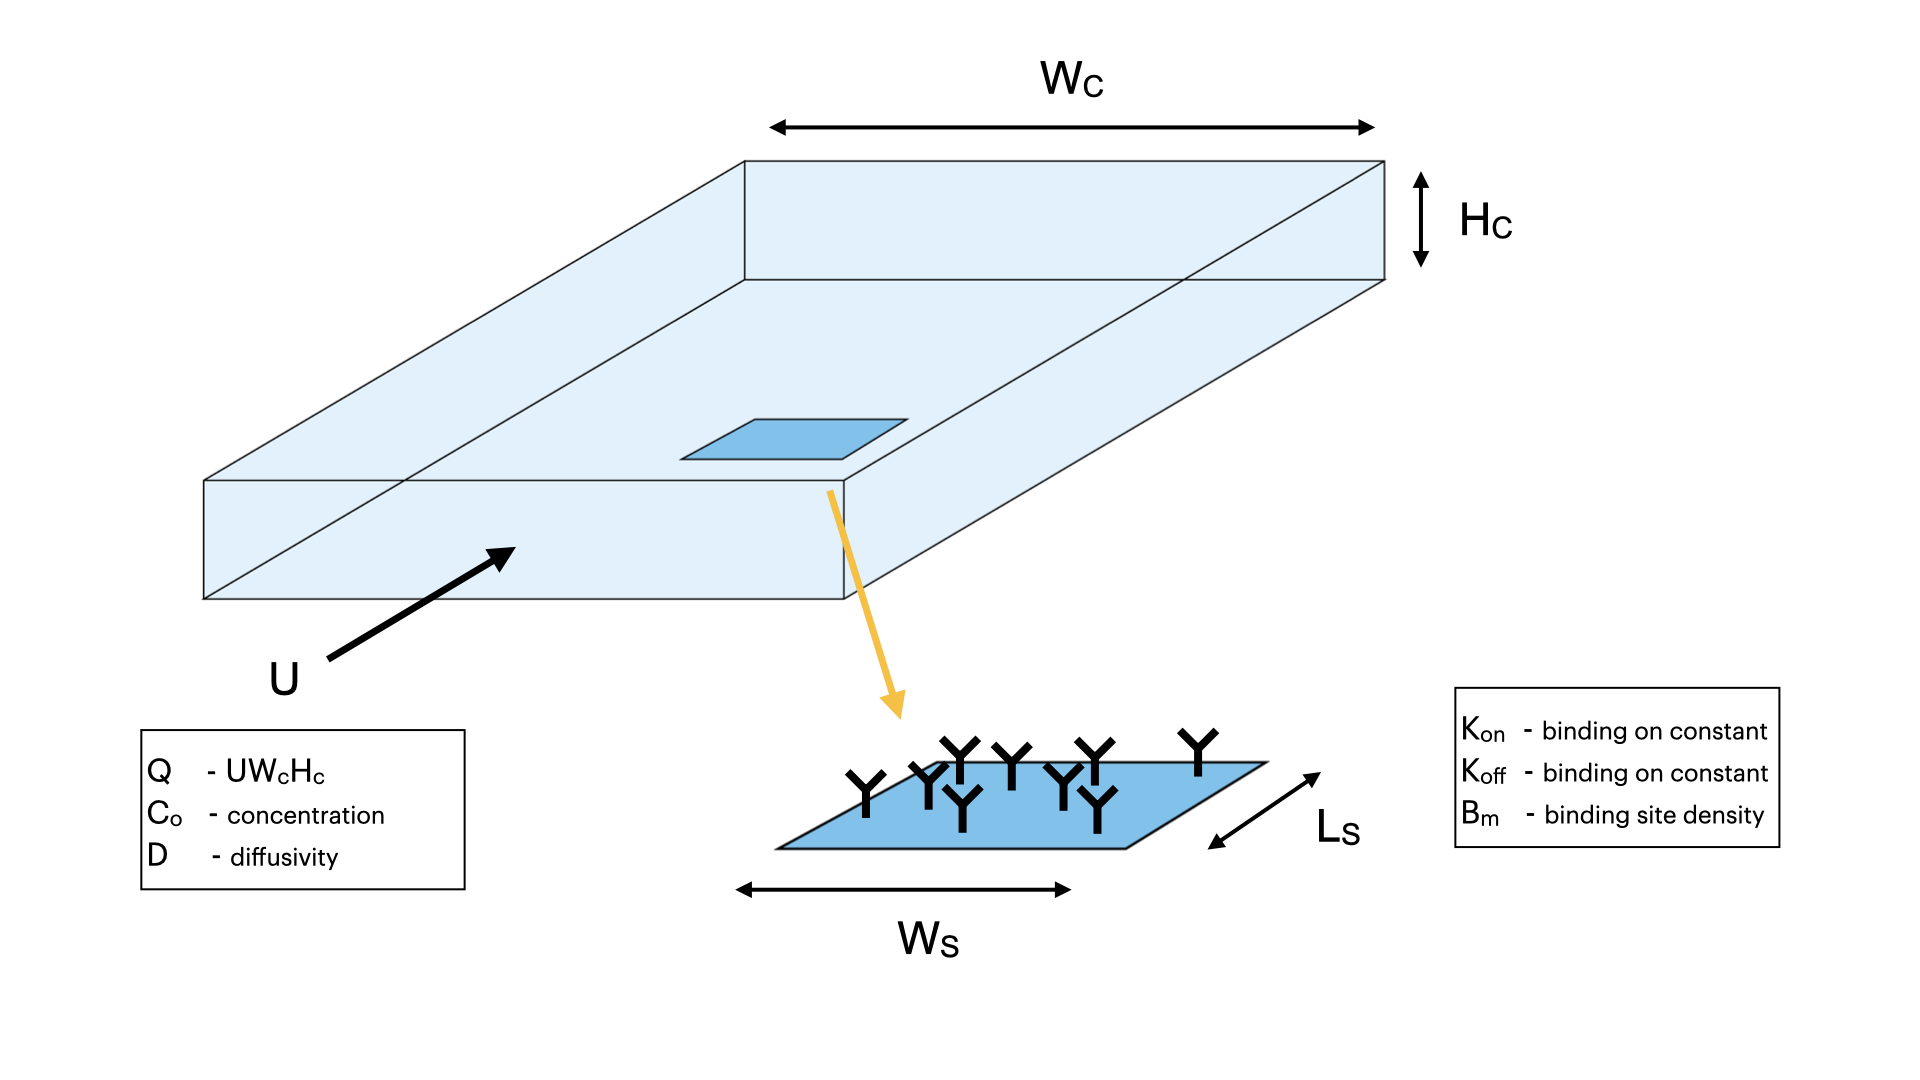

In [16]:
## Channel

Wc = 100e-6  # width of channel (m)
Hc = 100e-6   # height of channel (m)

## Sensor

Ws = 50e-6  # width of sensor (m)
Ls = 50e-6   # length of sensor (m)

## Target solution

d = 10       # diffusivity (u m^2/s)
Cu = 10e-15  # concentration (M (molarity - Moles/L))

## Flow

q = 10  # flow rate (uL / min)

## Reactions

Kon = 10e+6     # on-rate constant (M^-1 s^-1)
Koff = 10e-3    # off-rate constant (s^-1)
bm = 2e+12      # binding site density (sites/cm^2)
Kd = Koff/Kon   # rate constant (M)
Konu = Kon/1e3  # not in molar


## Unit conversion

D = d / 1e+12        # diffusivity (m^2/s)
Q = (q / 1e+9)/60    # flow rate (m^3/s)
Bm = bm*1e4          # binding site density (sites/m^2)
Co = Cu*1e3          # concentration (mol/m^3)

## Binding surface

Nr = Bm*Ws*Ls    # total binding sites
print ('Total number of binding sites = ' + format(Nr,'10.2E'))


Total number of binding sites =   5.00E+07
1e-09


## Determining mass transport regime

### Introduction

The mass transport in these systems is governed by diffusion and convection. 

Target molecules will diffuse through the sensor channel, and bind to the sensor via a high to low concentration gradient. However, this occurs slowly, meaning that test times become unfeasible for use in the real world. 

The introduction of a flow velocity to the system transports the sample convectively, delivering the target molecules to the sensor where diffusion occurs to bind to the receptors. 

A 'depletion zone' is thus formed in the sensor, signifying a concentration gradient.

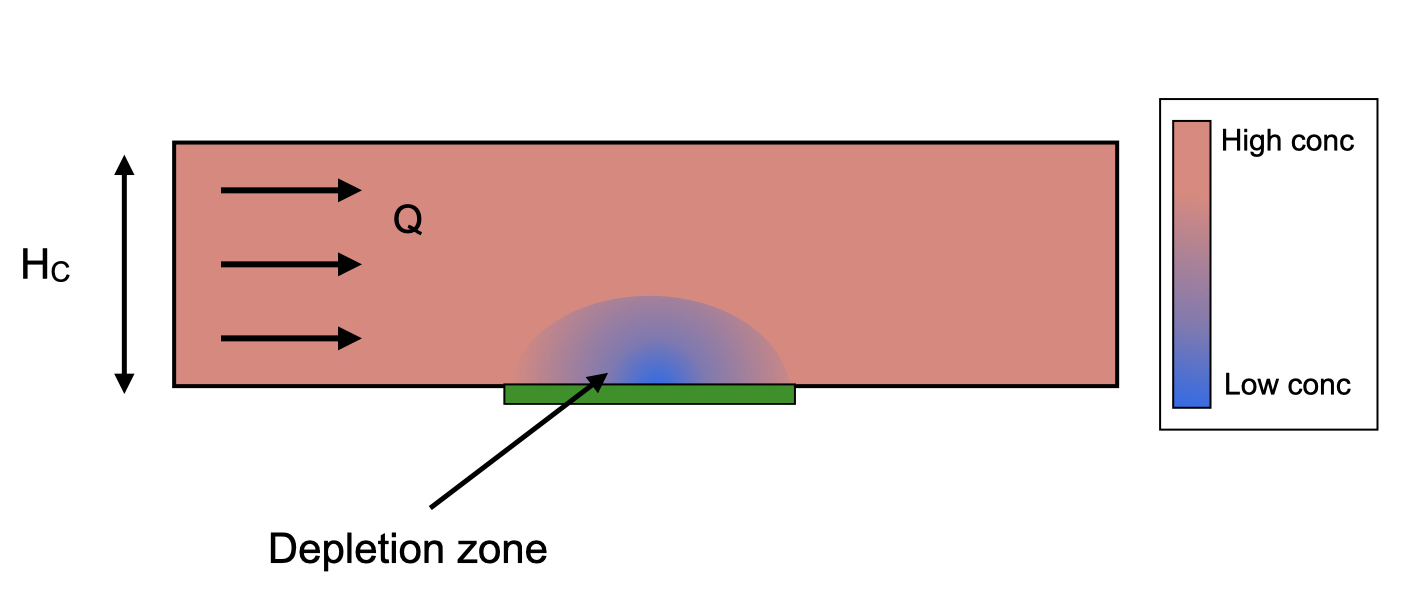

Understanding the relationship between diffusion and convection is key to be able to determine how the sample is transported through the device.

For example, in a system with a low concentration of target molecules and a low sample volume, capturing as many target molecules is key. So diffusive transport must dominate. 

However, in a system with a high concentration and high sample volume, the target molecules are much more abundant and therefore the system can flow faster to replenish the depletion zone, meaning that the sensor can become saturated much quicker.

To understand the relationship between these two forms of transport, dimensionless Peclet numbers can be calculated. 



### Peclet Numbers

#### Pe(H)

The channel Peclet number is defined as the ratio between the speed of diffusion and the speed of convection, using the channel height, Hc, as the the length scale. Which can be simplified to:

$ \Large Pe_H = \frac {Q}{D W_C} $

When $ Pe_H << 1 $ , diffusion is faster, and therefore the depletion zone develops in the channel and continues downstream. For example:

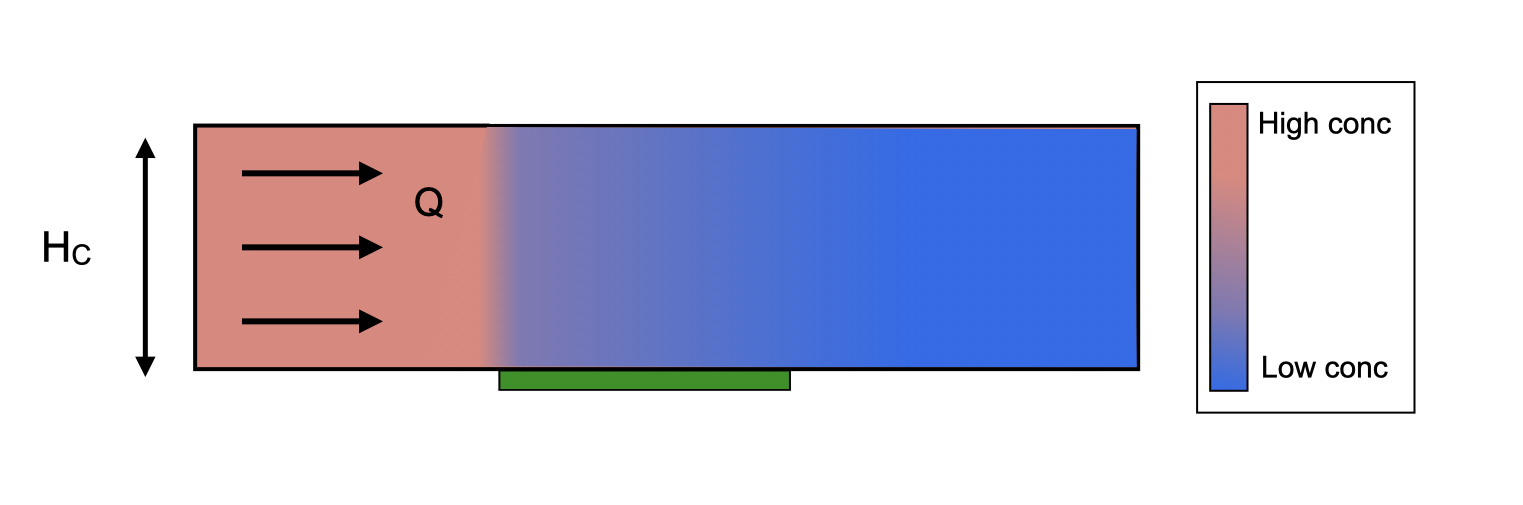

But if $ Pe_H >> 1 $ , convection becomes dominant due to a faster flow rate, Q. Here the depletion zone becomes thinner than the channel, for example: 

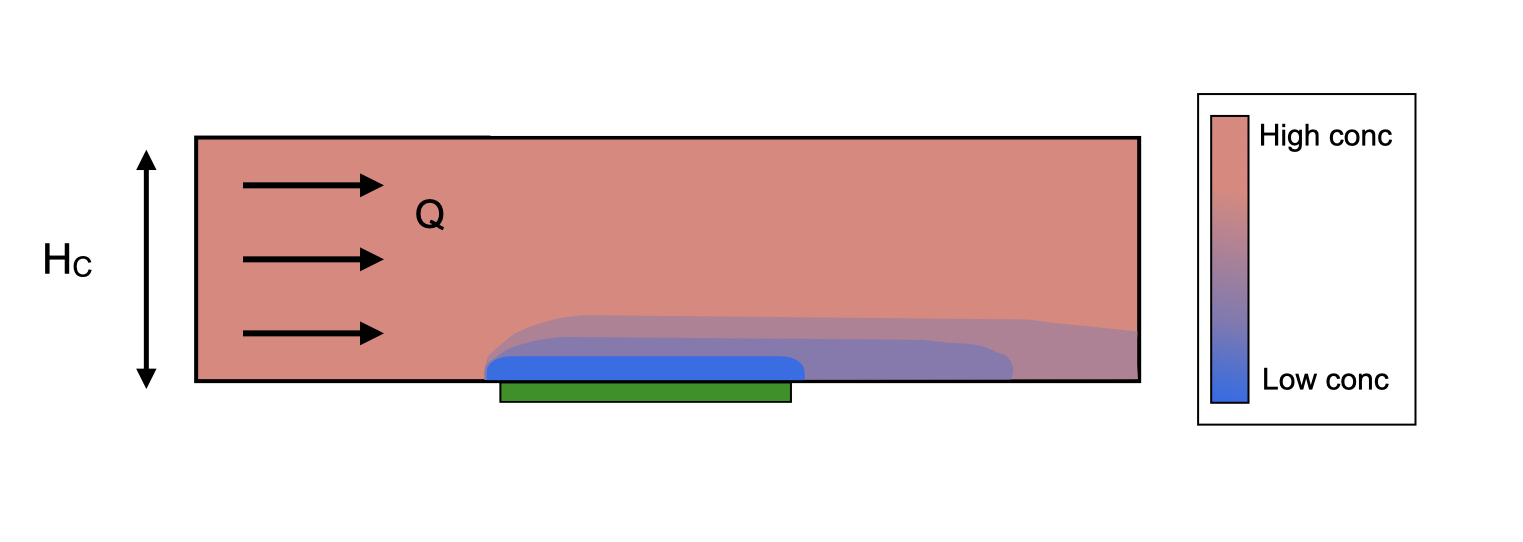

In this example, the depletion zone is constantly replenishing with target molecules. A concentration gradient is found between the high and low concentration areas as $ C_O - C_S $ where $ C_O $ is the concentration of the target solution and $ C_S $ is the concentration of target molecules at the sensor.

In [5]:
Peh = Q/(Wc*D)
print ('Peh ='+ format(Peh,"10.2E"))
if Peh < 1 :
    print ("Pe(H) < 1, so depletion zone extends far upstream, alternatively the depletion zone would be thinner than the channel.")
else :
    print ("Peh(H) > 1, so depletion zone thinner than channel, alternatively depletion zone would extend far upstream.")    
    

Peh =  1.67E+05
Peh(H) > 1, so depletion zone thinner than channel, alternatively depletion zone would extend far upstream.


#### Pe(S)

The depletion zone can also be characterised by the sensor peclet number, Pes, equal to:

$ \Large\ Pe_S = 6 \lambda^2 Pe_H $

where $ \lambda = L_s/H_c  $

This can tell us whether the depletion zone is thick or thin compared to the sensor itself.

When $ Pe_S << 1 $ , the depletion zone is thicker than the sensor.

When $ Pe_S >> 1 $ , the depletion zone is thinner than the sensor.

This is also a useful value for further calculations regarding flow.

In [6]:
Lambda = Ls/Hc # ratio of sensor length and channel height
Pes = 6*(Lambda**2)*Peh
print ('Pes ='+ format(Pes,"10.2E"))
if Pes < 1:
    print ("Pe(S) < 1, so depletion zone is thicker than sensor")
else:
    print ("Pe(S) > 1, so depletion zone is thinner than sensor")

Pes =  2.50E+05
Pe(S) > 1, so depletion zone is thinner than sensor


### Sherwood number (F), the dimensionless mass transport flux

With this qualititive sense of the depletion zone, further values can be given to describe the flow in the system. 

The Sherwood number F calculates the dimesionless transport flux through the depletion zone. This is dependant on the $ Pe_S $ value:

$ \Large Pe_s >> 1, F = 0.81Pe_s^{1/3} + 0.71Pe_s^{-1/6} + 0.21Pe_s^{-1/3} $

$ \Large Pe_s << 1, F = \pi (\ln (4/Pe_s^{1/2}+1.06)^{-1} $

In [7]:
if Pes > 1:
    F = 0.81*Pes**(1/3) + 0.71*Pes**(-1/6) - 0.2*Pes**(-1/3)
else:
    F = RR(pi*(ln(4/Pes^(1/2)) + 1.06)**(-1))
print('F = ' + format(F,"1.3"))
print('The Sherwood number (F) depends on Pes, the sensors Peclet number.')
print('\n')

F = 51.1
The Sherwood number (F) depends on Pes, the sensors Peclet number.




### Flux through depletion zone Jd

The Sherwood number can be used to describe this flux in dimensional terms. Where:

$ \Large J_D = D C_o W_s F $

This can give the rate at which molecules are delivered to the surface of the sensor.

In [8]:
Jd = D*Co*Ws*F*N_A    #  total collection rate [molecules/sec]
jd = 1/Jd   # seconds per each molecule
print('Jd = ' + format (Jd,'10.2E'))
print('total collection rate [molecules/sec].')
print('\n')
print('jd = ' + format (jd,'10.2E'))
print('time for one molecule (s)')
print('\n')




Jd =   1.54E-01
total collection rate [molecules/sec].


jd =   6.50E+00
time for one molecule (s)




## Finding reaction limits 

In a system with a mass transport regime that supplies target molecules to the sensor more quickly than the binding reactions can occur, the transport is said to be limited by the rate of said reactions. 

For example, in figure (*), the depletion zone is thinner than the channel and the channel peclet number is high which suggests a fast flow. With a high concentration sample, target molecules are therefore being supplied to the sensor very quickly.

** insert figure simulation of reaction limited system, high Peh, high conc, high flow rate **

In this scenario, the concentration of the sample at the sensor, Cs, is approximately the same as that of the concentration of the sample before reaching the sensor, Co.

Assuming first order Langmuir kinetics, the fraction of surface concentration of receptors bound with target molecules, B, and the concentration of total binding sites, Bm, is found as:
  
  
  
$ \Large\frac{B}{B_m} = (\frac{C_o/K_d}{1+C_o/K_d})(1 - e^{-(K_{on}C_o+K_{o f f})t}) $ (Making it stick reference here)

This equation can be used to plot the equilibration of the system over time.

In [22]:
t = 1500 #

x = np.arange(0,t,t/30)
y = np.arange(0,Nr,Nr/50)

Phi = ((Cu/Kd)/(1+Cu/Kd))*(1-math.e**(-((Kon*Cu)+Koff)*x))

     
def equilibirum(eq):

    Phieq = ((Cu/Kd)/(1+Cu/Kd))*(1-math.e**(-((Kon*Cu)+Koff)*eq))

    plt.plot(x, Phi, linestyle = "dotted")
    plt.axvline(x = eq)
    plt.axhline(Phieq)
    plt.show()
    
    print ('Fraction of molecules at ' + str(eq) + 's = ' + format(Phieq,"10.2E"))

interact(equilibirum,eq=(0,t,t/(t/40)))

interactive(children=(FloatSlider(value=720.0, description='eq', max=1500.0, step=40.0), Output()), _dom_class…

<function __main__.equilibirum(eq)>

As $ {t\to\infty} $, this equation can tell us the fraction of bound receptors on the sensor surface in equilibrium:
  
$ \Large\frac{B_{eq}}{B_m} = (\frac{C_o/K_d}{1+C_o/K_d}) \equiv (\frac{\tilde{c}}{1 + \tilde{c}}) $

Where 

$ \Large\tilde{c} = \frac {C_o}{K_D} $

is the dimensionless concentration of the target solution.

In [18]:
Cd = (Cu/Kd)             # dimensionless concentration 
BeqF = BeqF = Cd/(1+Cd)  # fraction of the available sites bound in equilibrium

print ('Dimensionless concentration = ' + format(Cd,"10.2E"))
print('\n')
print ('Fraction of bound receptors on the sensor surface in equilibrium = ' + format(Cd,"10.2E"))


Dimensionless concentration =   1.00E-05


Fraction of bound receptors on the sensor surface in equilibrium =   1.00E-05


Using this concentration, the number of receptors that are bound in equilbrium can be found, using the known value of the number of receptors, Nr, (calculated in inital declarations):

$ \Large\ N_R^B = B_m A C_o $

In [20]:
Nrb = (Nr*Cu/Kd)     # average number of target molecules bound at equilibrium
print('Average number of target molecules bound at equilibrium = '+ format(Nrb,"10.2E"))


Average number of target molecules bound at equilibrium =   5.00E+02


From this, a critical concentration can be found:

$ \Large\ C^* = \frac{K_d}{B_m A} $

Where $C^*$ is the concentration at which only one target molecule binds to the sensor in equilibrium. 

In [12]:
Ccrit = Kd/(Bm*Ws*Ls)
print('Critical concentration = '+ format(Ccrit,"10.2E"))


Critical concentration =   2.00E-17


Comparing Co and C*:

In [21]:
print('Co = ' + format (Cu,'10.2E') + '  and   C* = ' + format (Ccrit,'10.2E'))


Co =   1.00E-14  and   C* =   2.00E-17


Systems that give (Co < C*) have only a fraction of a target molecule binding to the sensor in equilibrium. 

For example, if the concentrations are: 0.25*Co = C*, a target molecule will bind to the sensor in 1/4 experiments. 

## Combining mass transport and reactions

The rate at which a sensor works is limited by either the speed of the mass transport or the speed at which the reactions take place.

For example, in a system with a very low flow rate, target molecules are delivered very slowly to the sensor via purely convective and diffusive transport. So much so that the reaction speed becomes insignificant. This becomes a **mass transport limited** system.

On the other hand, as previously discussed in section 4, a system in which the target solution is delivered faster than the binding takes place, the system is **reaction limited**.

The Damkohler number, Da, can be used to quantify the relationship between diffusion and reactions in a system:

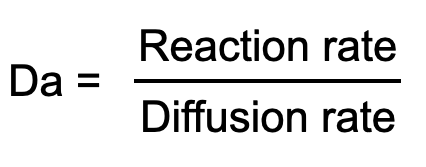

**If Da << 1 the binding kinetics are reaction limited.**

**If Da >> 1 the binding kinetics are mass-tranport limited.**

The Damkohler number is found in this system to be:

$ \Large\ Da = \frac{K_{on} B_m L}{D F} $

Where F is the Sherwood number

Knowing which scenario the system is limited by means that the equilbriation time scale can be approximated. 

For a mass transport limited system (Da << 1):

$ \Large\ t_R = \frac {1}{K_{off}} $

For a reaction limited system (Da >> 1), where convection-reaction-diffusion are all a factor:

$ \Large\ t_{CRD} = Da  \hspace{0.2cm} t_R = Da \frac {1}{K_{off}}  $

In [23]:
Da = (Konu*Bm*Ls)/(D*F*N_A)

print ('Da = ' + format(Da,'10.2E'))

Da =   3.25E+01


In [24]:
tR = 1/Koff

if Da < 1:
    tR = tR
else:
    tR = Da*tR

print('tR = ' +format(tR,'10.2E') +' s')
print('time scale to reach equilibrium')
print('\n')

tR =   3.25E+03 s
time scale to reach equilibrium




## References

1. Kosack CS, Page A-L, Klatser PR. A guide to aid the selection of diagnostic tests. Bulletin of the World Health Organization [Internet]. 2017 Jun 26;95(9):639–45. Available from: https://www.who.int/bulletin/volumes/95/9/16-187468/en/

2. W PR, K HK, Mabey D, Ronald A. Rapid tests for sexually transmitted infections (STIs): the way forward. Sexually Transmitted Infections [Internet]. 2006;82:v1–6. Available from: https://sti.bmj.com/content/82/suppl_5/v1

3. Urdea M, Penny LA, Olmsted SS, Giovanni MY, Kaspar P, Shepherd A, et al. Requirements for high impact diagnostics in the developing world. Nature. 2006 Nov;444(S1):73–9.